> # **Name: Nader Elhadedy**

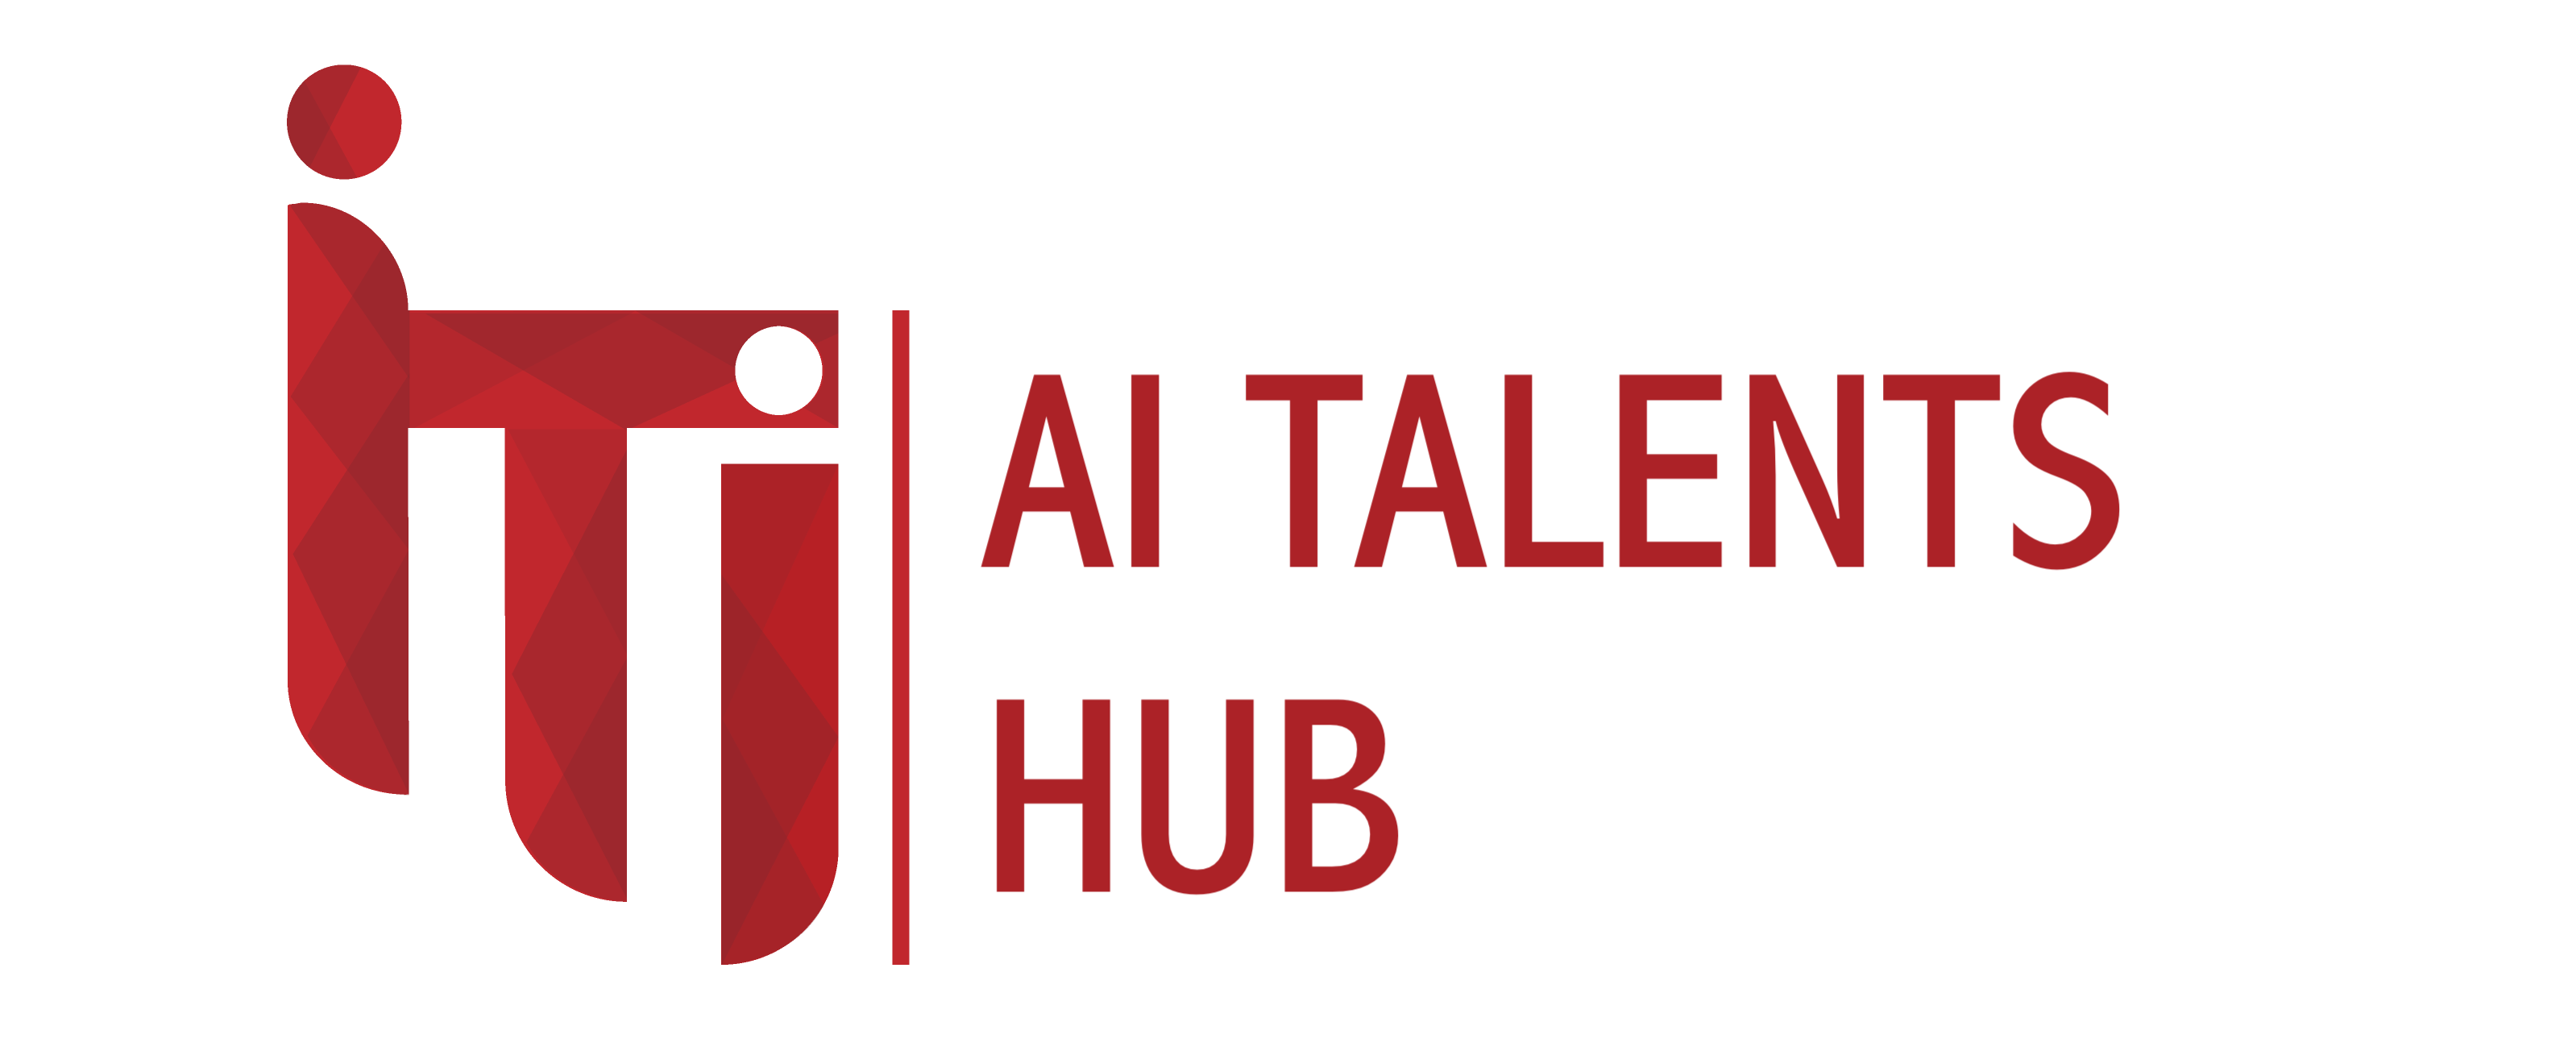

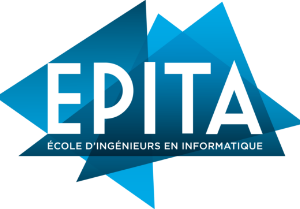

Write the linear regression with
numpy and matplotlib. The code must contain only universal functions of numpy, pyplot
functions of matplotlib using the FuelConsumptionCo2 data set to implement this project with this steps:


**Linear regression is a method for modeling the relationship between two scalar values: the input variable x and the output variable y.**



The model assumes that y is a linear function or a weighted sum of the input variable.

**y = f(x)**

Or, stated with the coefficients.

**y = b0 + b1 . x1**

The model can also be used to model an output variable given multiple input variables called multivariate linear regression (below, brackets were added for readability).

**y = b0 + (b1 . x1) + (b2 . x2) + ...**

The objective of creating a linear regression model is to find the values for the coefficient values (b) that minimize the error in the prediction of the output variable y.

## Matrix Formulation of Linear Regression
Linear regression can be stated using Matrix notation; for example:

**y = X . b**

Or, without the dot notation.

**y = Xb**

Where X is the input data and each column is a data feature, b is a vector of coefficients and y is a vector of output variables for each row in X.

$X =
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & x_{1,3}\\
  x_{2,1} & x_{2,2} & x_{2,3}\\
  x_{3,1} & x_{3,2} & x_{3,3}\\
  x_{4,1} & x_{4,2} & x_{4,3}\\
 \end{pmatrix}$

$b =
 \begin{pmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}\\
 \end{pmatrix}$

$y =
 \begin{pmatrix}
  y_{1} \\
  y_{2} \\
  y_{3}\\
  y_{4}\\
 \end{pmatrix}$

# Making the Necessary Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#  dataset Preparation Function


prepare_data_Func:

I/P: noise_variance, Length

O/P: data_set=> X,Y

   -> plot Y_exact vs Y on X to check iffect of noise
   
operation: Y_exact= b_n*x^n+.....+b_2*x^2+b_1*x+b_0

=>>  Y= Y_exact+noise

hint= keep acceptable margin of errors between Y and Y_exact

In [2]:
def prepare_data(mean, var, length):
  X = np.arange(length).reshape(length,1)
  X = (X - np.mean(X)) / np.std(X)
  N = np.random.normal(mean, np.sqrt(var), length).reshape(length,1)
  Y_exact = 3 * X**3 + 2 * X**2 + 5 * X + 1
  Y_noise = Y_exact + N
  
  return X, Y_exact, Y_noise

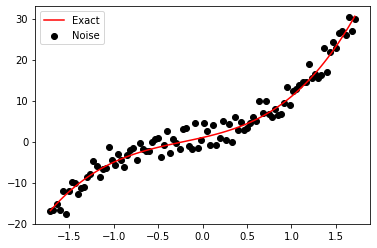

In [3]:
X, Y_exact, Y_noise = prepare_data(0, 4, 100)

plt.plot(X, Y_exact, color="r", label="Exact")
plt.scatter(X, Y_noise, color="k", label="Noise")
plt.legend()
plt.show()

## Linear Regrission class

 Methods :
 
  Train,
  
  Predict,
  
  calc errors,
  
  plot Y_data Vs Y_predected

In [4]:
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

class LinearRegression:
  def __init__(self):
    self.b = 0

  def train(self, X, Y):
    self.b = pinv(X).dot(Y)

  def predict(self, X):
    return X.dot(self.b)

  def calc_errors(self, Y, Yhat):
    return np.mean((Y - Yhat)**2)

  def plot_data(self, X, Y, Yhat):
    plt.scatter(X, Y, color="k", label="Actual Data")
    plt.plot(X, Yhat, color="r", label="Predicted Data")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Actual vs Predicted Data")
    plt.show()

In [5]:
from numpy import genfromtxt

dataset = genfromtxt('assig2_data.csv', delimiter=" ")
X = np.array(dataset[:,0])
X = X.reshape(len(X),1)
Y = np.array(dataset[:,1])

In [6]:
# initialize model
model = LinearRegression()

In [7]:
# train model
model.train(X, Y)

In [8]:
# predict model
Yhat = model.predict(X)

In [9]:
# calculate error
model_error = model.calc_errors(Y, Yhat)
print(model_error)

0.0019593936132041617


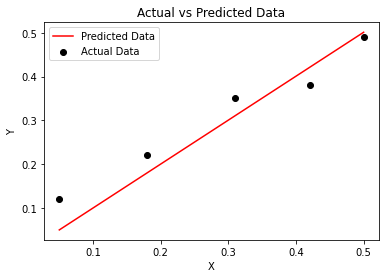

In [10]:
# plot actual vs predicted data
model.plot_data(X, Y, Yhat)

## using Matrix operations

In [11]:
import pandas as pd

df = pd.read_csv('FuelConsumptionCo2.csv')

df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [13]:
df = df.select_dtypes(exclude='object')
print(df.columns)
print(len(df.columns))

Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')
8


In [14]:
df = df.drop(columns='MODELYEAR')

df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [15]:
df = df.astype('float64')

df.dtypes

ENGINESIZE                  float64
CYLINDERS                   float64
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG    float64
CO2EMISSIONS                float64
dtype: object

In [16]:
features = df[df.columns.difference(['CO2EMISSIONS'])]
target = df.CO2EMISSIONS

In [17]:
features_mat = np.matrix(features)
target_mat = np.matrix(target).T

In [18]:
new_obj = LinearRegression()

new_obj.train(features_mat, target_mat)

In [19]:
new_obj.b

matrix([[10.33666072],
        [ 7.62552936],
        [-7.64837046],
        [27.51976383],
        [ 1.06227947],
        [-7.91239388]])

In [20]:
pred_target = new_obj.predict(features_mat)

In [21]:
pred_target

matrix([[196.83901022],
        [208.05656882],
        [174.3588509 ],
        ...,
        [255.09484881],
        [251.70273441],
        [267.37764634]])

<hr>

> # Taking the intercept (Θ<sub>0</sub>) into consideration

In [22]:
features_mat_grd = np.c_[np.ones(len(features_mat)), features_mat]

In [23]:
features_mat_grd

matrix([[ 1. ,  4. ,  2. , ...,  8.5, 33. ,  6.7],
        [ 1. ,  4. ,  2.4, ...,  9.6, 29. ,  7.7],
        [ 1. ,  4. ,  1.5, ...,  5.9, 48. ,  5.8],
        ...,
        [ 1. ,  6. ,  3. , ..., 11.8, 24. ,  9.8],
        [ 1. ,  6. ,  3.2, ..., 11.3, 25. ,  9.3],
        [ 1. ,  6. ,  3.2, ..., 12.8, 22. , 10.2]])

In [24]:
new_obj.train(features_mat_grd, target_mat)

In [25]:
new_obj.b

matrix([[253.53120115],
        [  7.698747  ],
        [  8.57767262],
        [-10.59262337],
        [ 17.75286099],
        [ -3.86924281],
        [ -3.48918281]])

In [26]:
pred_target_grd = new_obj.predict(features_mat_grd)

In [27]:
pred_target_grd

matrix([[196.45134368],
        [217.62793788],
        [132.41792225],
        ...,
        [265.94348838],
        [261.95425268],
        [275.86576134]])

## using gradient dessent

In [28]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
 m = len(Y)
 
 for iteration in range(iterations):
  # Hypothesis Values
  h = X.dot(B)
  # Difference between Hypothesis and Actual Y
  loss = h - Y
  # Gradient Calculation
  gradient = X.T.dot(loss) / m
  # Changing Values of B using Gradient
  B = B - alpha * gradient
 
 return B

In [29]:
new_model = LinearRegression()

B = np.matrix(np.zeros(features_mat_grd.shape[1])).T

new_model.b = batch_gradient_descent(features_mat_grd, target_mat, B, 0.001, 100000)

new_model.b

matrix([[60.22650519],
        [ 9.72083866],
        [ 7.82362987],
        [ 3.00891094],
        [ 4.55398232],
        [-0.10826121],
        [ 2.43654158]])

In [30]:
predicted_target = new_model.predict(features_mat_grd)

predicted_target

matrix([[196.0063962 ],
        [210.92639934],
        [164.70266899],
        ...,
        [257.35866312],
        [253.81541047],
        [269.18187688]])

## Be Carfull about model hypothes degree

## upate X, Y_exact in prepare_data_func to:

x = np.linspace(-5,5,L)
y_exact= 1/(1+np.exp(-x))+5

#### generate and save  in data_train.csv
#### generate and save  in data_test.csv

In [31]:
def prepare_data(mean, var, length):
  X = np.linspace(-5,5,length).reshape(length,1)
  N = np.random.normal(mean, np.sqrt(var), length).reshape(length,1)
  Y_exact = 1/(1+np.exp(-X))+5
  Y_noise = Y_exact + N
  
  return X, Y_exact, Y_noise

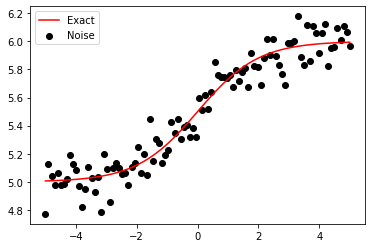

In [32]:
X, Y_exact, Y_noise = prepare_data(0, 0.01, 100)

plt.plot(X, Y_exact, color="r", label="Exact")
plt.scatter(X, Y_noise, color="k", label="Noise")
plt.legend()
plt.show()

In [33]:
new_df = pd.DataFrame(data=np.column_stack((X,Y_exact)),columns=['X','Y'])

In [34]:
msk = np.random.rand(len(new_df)) < 0.8
train = new_df[msk]
test = new_df[~msk]

train.to_csv('data_train.csv')
test.to_csv('data_test.csv')

## use generated data_train.csv to train the model
## and get the lowest error in predection of data_train and data_test
## hent you may need to update your model hypothes

### plot Y_train vs Y_train_hat
### Plot Y test vs Y_test_hat
### print error of each plot

### print your parameters value


In [35]:
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

> **Predicting test data**

In [36]:
my_model = LinearRegression()

In [37]:
X_TR = np.array(df_train.X).reshape(len(df_train),1)
Y_TR = np.array(df_train.Y).reshape(len(df_train),1)

X_TR_new = np.c_[np.ones(len(X_TR)), X_TR]

my_model.train(X_TR_new, Y_TR)

In [38]:
my_model.b

array([[5.50495687],
       [0.13178641]])

In [39]:
X_TS = np.array(df_test.X).reshape(len(df_test),1)
Y_TS = np.array(df_test.Y).reshape(len(df_test),1)

X_TS_new = np.c_[np.ones(len(X_TS)), X_TS]

Y_TS_predicted = my_model.predict(X_TS_new)

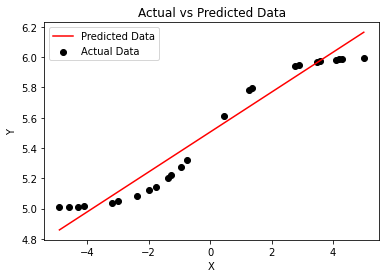

In [40]:
my_model.plot_data(X_TS, Y_TS, Y_TS_predicted)

In [41]:
my_model.calc_errors(Y_TS, Y_TS_predicted)

0.009069999253954691

> **Predicting train data**

In [42]:
Y_TR_predicted = my_model.predict(X_TR_new)

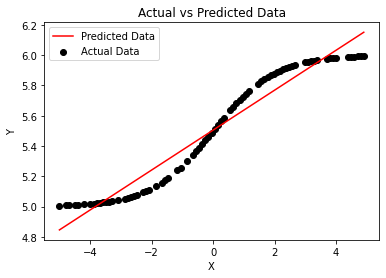

In [43]:
my_model.plot_data(X_TR, Y_TR, Y_TR_predicted)

In [44]:
my_model.calc_errors(Y_TR, Y_TR_predicted)

0.007743637411330092